In [1]:
import tensorflow #used for developing models to create neural nettwork arhitectures
from tensorflow.keras.applications import InceptionV3 #designed by Google
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator # loading, resizing, and augmenting images, essential for preparing image data for training model

# Building CNN Model:

In [4]:
tensorflow.test.is_gpu_available() 

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [5]:
tensorflow.config.list_physical_devices('GPU') 

[]

In [6]:
labels = os.listdir("archive/train")

In [7]:
labels 

['Closed', 'no_yawn', 'Open', 'yawn']

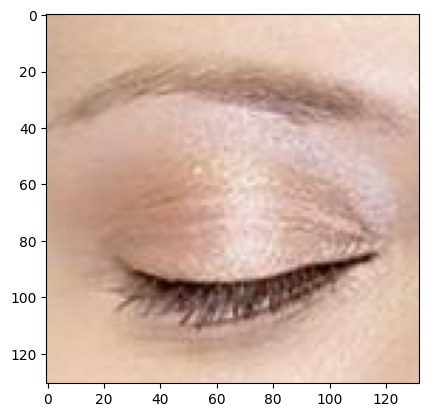

In [8]:
plt.imshow(plt.imread("archive/train/Closed/_2.jpg")) #EDA

In [10]:
a = plt.imread("archive/train/yawn/10.jpg")

In [11]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

In [12]:
a.shape

(480, 640, 3)

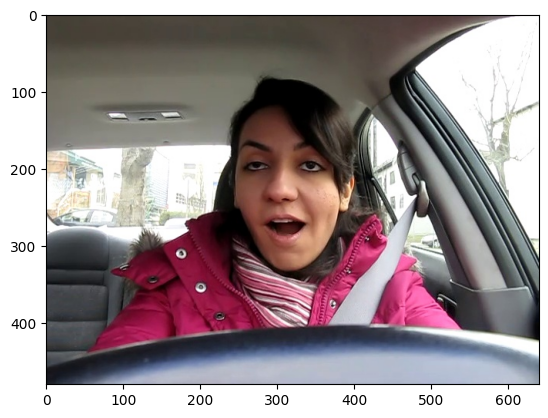

In [13]:
plt.imshow(plt.imread("archive/train/yawn/5.jpg"))

In [14]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2) #rescales the pixel values of images to a range of [0,1]
# dividing by 255 and also sets aside 20% of the data for validation during training.

In [15]:
train_data = train_data_gen.flow_from_directory("archive/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [16]:
validation_data = train_data_gen.flow_from_directory("archive/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [17]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [18]:
test_data = test_data_gen.flow_from_directory("archive/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [19]:
train_data

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential #used to create a linear stack of layers, which is a common way to build neural networks
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

Input: Represents the input data to the model.

Lambda: Allows for custom operations or transformations on the input data.

Dense: Represents a fully connected layer, where each neuron is connected to every neuron in the previous layer.

Flatten: Flattens the input into a 1D array, typically used to transition from convolutional layers to fully connected layers.

Conv2D: Represents a 2D convolutional layer, which applies a set of filters to the input.

MaxPooling2D: Performs 2D max pooling, which reduces the spatial dimensions of the input by taking the maximum value within each region.

Dropout: A regularization technique that randomly drops a fraction of input units during training to prevent overfitting.

In [21]:
model = Sequential()

#activation="relu":  sets the activation function for the layer to ReLU (Rectified Linear Unit), which is commonly used in deep learning models for introducing non-linearity.
# the boundary range for the ReLU function is [0, +∞).

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [27]:
model.build(input_shape=(80, 80, 3))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [29]:
validation_steps = len(test_data)
validation_steps

363

In [30]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
291/291 [==============================] - 53s 183ms/step - loss: 0.7040 - accuracy: 0.6588 - val_loss: 0.4217 - val_accuracy: 0.7752
Epoch 2/55
291/291 [==============================] - 53s 183ms/step - loss: 0.4335 - accuracy: 0.7841 - val_loss: 0.3638 - val_accuracy: 0.8041
Epoch 3/55
291/291 [==============================] - 53s 182ms/step - loss: 0.3647 - accuracy: 0.8229 - val_loss: 0.3561 - val_accuracy: 0.8221
Epoch 4/55
291/291 [==============================] - 55s 190ms/step - loss: 0.3317 - accuracy: 0.8436 - val_loss: 0.3537 - val_accuracy: 0.8297
Epoch 5/55
291/291 [==============================] - 55s 189ms/step - loss: 0.3156 - accuracy: 0.8483 - val_loss: 0.3165 - val_accuracy: 0.8445
Epoch 6/55
291/291 [==============================] - 52s 179ms/step - loss: 0.2683 - accuracy: 0.8772 - val_loss: 0.2719 - val_accuracy: 0.8697
Epoch 7/55
291/291 [==============================] - 52s 180ms/step - loss: 0.2587 - accuracy: 0.8850 - val_loss: 0.2508 - val_ac

In [31]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

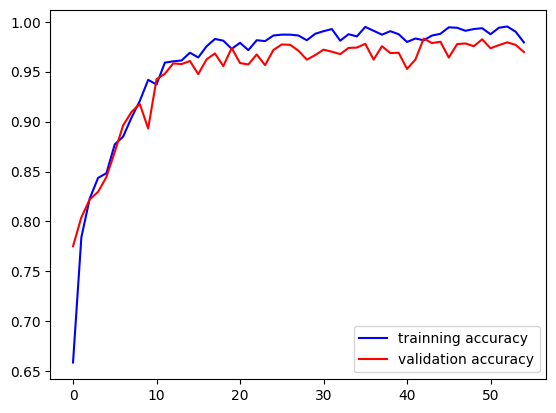

In [32]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

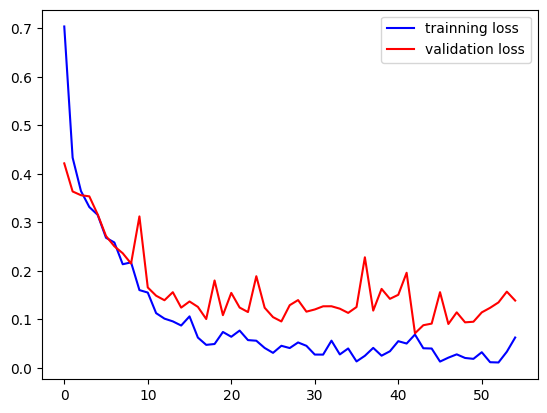

In [33]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [34]:
model.save("drowiness.h5")

C:\Users\rdars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
model.save("drowiness.model")

INFO:tensorflow:Assets written to: drowiness.model\assets


INFO:tensorflow:Assets written to: drowiness.model\assets


# Drowsiness Main

In [9]:
!pip install pillow
#TensorFlow and Keras, rely on Pillow for image-related operations, such as loading and preprocessing images for training deep learning models

In [10]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [11]:
model = load_model('drowiness.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

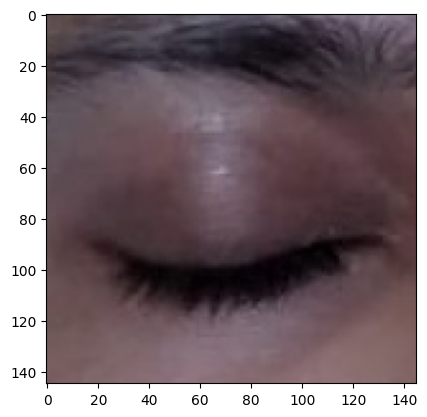

In [13]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"archive\train\Closed\_0.jpg"))

In [14]:
image_size = (80, 80)

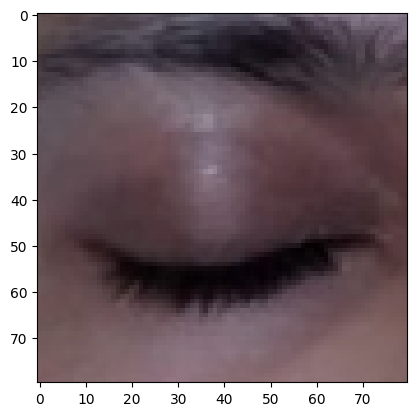

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
image = Image.open(r"archive\train\Closed\_0.jpg")

# Resize the image
image_size = (80, 80)  # Example size, replace with your desired size
img = image.resize(image_size)

# Display the resized image
plt.imshow(img)
plt.show()

In [16]:
img = np.array(img)/255.0

In [17]:
img.shape

(80, 80, 3)

In [18]:
result = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 217ms/step


In [19]:
result.shape

(1, 4)

In [20]:
result

array([[1.0000000e+00, 2.1765347e-09, 2.9679289e-14, 9.7915892e-13]],
      dtype=float32)

In [21]:
predicted_label_index = np.argmax(result)

In [22]:
if (predicted_label_index==0):
    print('Closed eyes')
    
elif predicted_label_index==1:
    print('No Yawn Detected')
    
elif predicted_label_index==2:
    print('Open eyes')
    
elif predicted_label_index==3:
    print('Yawn Detected')

Closed eyes


In [23]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')
    
elif predicted_label_index==1:
    print('No Drowsiness Detected')

Drowsiness Detected


In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Function to preprocess a frame
def preprocess_frame(frame):
    # Resize frame to match input size of your model
    resized_frame = cv2.resize(frame, (80, 80))
    # Perform any other preprocessing steps (if required)
    return resized_frame

# Function to overlay prediction on a frame with corresponding message
# Function to overlay prediction on a frame with corresponding message
def overlay_prediction_with_message(frame, prediction, face_coordinates):
    # Get the index of the class with the highest probability
    predicted_label_index = np.argmax(prediction)

    # Define messages based on predicted label index
    if predicted_label_index == 0 or predicted_label_index == 3:
        message = 'Drowsy'
    else:
        message = 'Alert'

    # Draw rectangle around the face region
    x, y, w, h = face_coordinates
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw the message on the frame
    cv2.putText(frame, message, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame



In [26]:

# Load the trained model
model = load_model('drowiness.h5')


In [27]:

# Path of the local video file
video_path = "Drowsy Driver.mp4"


In [28]:

# Open the video stream
video_capture = cv2.VideoCapture(video_path)

# Check if the video stream is opened successfully
if not video_capture.isOpened():
    print("Error: Unable to open video file:", video_path)
    exit()


In [29]:

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

print("Video properties:")
print("Frame width:", frame_width)
print("Frame height:", frame_height)
print("FPS:", fps)


Video properties:
Frame width: 640
Frame height: 360
FPS: 25


In [30]:

# Define the codec and create VideoWriter object for output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_video.avi', fourcc, fps, (frame_width, frame_height))


In [31]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [32]:
# Process each frame
while True:
    ret, frame = video_capture.read()
    if not ret:
        print("No more frames to read.")
        break

    # Convert frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Initialize frame_with_prediction to the original frame
    frame_with_prediction = frame.copy()

    # Process each detected face
    for (x, y, w, h) in faces:
        # Crop the face region
        face_region = frame[y:y+h, x:x+w]

        # Preprocess the face region
        processed_face = preprocess_frame(face_region)

        # Perform prediction using your CNN model
        prediction = model.predict(processed_face[np.newaxis, ...])[0]

        # Overlay prediction with corresponding message on the frame
        frame_with_prediction = overlay_prediction_with_message(frame_with_prediction, prediction, (x, y, w, h))

    # Write the frame with predictions to the output video
    output_video.write(frame_with_prediction)

    # Display the frame with prediction (optional)
    cv2.imshow('Frame', frame_with_prediction)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


1/1 [==============================] - 0s 17ms/step


: 